## Exercise 1: Getting familiar with pandas

In [2]:
## Pandas 
# there are several ways to change a column in a dataframe
# A short intro to pandas https://pandas.pydata.org/pandas-docs/stable/10min.html

import pandas as pd
import numpy as np
import random

In [3]:
# First step: make the data frame
dates = pd.date_range('20130101', '20140101') #366
data = pd.DataFrame(np.random.randn(366,4), index=dates, columns=list('ABCD'))

### 1.1 Inspect the dataframe with the following commands: head(), tail(), describe.

In [4]:
# Solution

data.describe()
data.head()
data.tail()

,A,B,C,D
2013-12-28,-0.504931,-0.172768,3.073918,1.418597
2013-12-29,2.187906,-0.389126,1.688600,-1.812274
2013-12-30,-0.600573,-0.609973,-0.655919,1.431228
2013-12-31,-1.408459,-1.421969,1.099690,-1.036196
2014-01-01,0.894577,-0.996871,0.816914,0.405218


### 1.2  The index is a time series, and pandas has a build-in command for re-sampling dataframes (documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).  Use resample to get the median every 2 days and save this as a new dataframe.

In [5]:
#Solution: 
    
new_data = data.resample('2D').median()

### 1.3 Inspect the new dataframe to see the difference in size compared to the inital dataframe.

In [6]:
data.count(), new_data.count()

(A    366
 B    366
 C    366
 D    366
 dtype: int64, A    183
 B    183
 C    183
 D    183
 dtype: int64)

### 1.4  Write your new dataframe to a csv file.

In [ ]:
new_data.to_csv('test_pythoncourse', sep='\t')

### 1.5 Merge the two dataframes. There are several ways to do this, see also https://pandas.pydata.org/pandas-docs/stable/merging.html.

In [7]:
# Solution
#generate another dataframe and merge them together
new_data.merge(data, how='left').head()

,A,B,C,D
0,-0.990819,-0.500740,-0.378429,0.587768
1,-0.880390,0.642009,-1.254921,0.371295
2,-0.921438,-0.152966,-0.579676,1.027905
3,-0.631404,0.583703,1.164311,-0.049322
4,0.507787,0.616022,-0.300950,-0.757167


### 1.6 There are several ways to perform actions on the dataframe columns. The dataframe has several columns containing negative values. For this exercise, find these negative values on a column, and create a new column with their absolute value, using a list comprehension, and after this, using a lambda function. You can use the magic timeit to see if there is a difference between these operations.

In [13]:
# Solution
# method 1: list comprehension
%timeit data['E'] = [ abs(x) for x in data['B'] ]

The slowest run took 12.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 226 µs per loop


In [14]:
# method 2: lambda function

%timeit data['F'] = data['B'].apply(lambda x: abs(x) ) 



The slowest run took 4.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 279 µs per loop


## Exercise 2: Supervised learning: Classification of MNIST data

### 2.1 Download the digit ('MNIST original') dataset from  mldata.org, which is a public repository for machine learning data. Divide the data into training and testing. Please use 1/7 for training and the rest for testing. 

Hint: The sklearn.datasets package is able to directly download data sets from the repository using the function sklearn.datasets.fetch_mldata. Generate the training and testing set by importing train_test_split from sklearn.model_selection

 

In [22]:
# Solution
import sklearn 
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

from sklearn.model_selection import train_test_split
train_img, test_img, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)



### 2.2 The optimal performance of many machine learning algorithms is effected by scale. Typically, you need to scale the features in your data before applying any algorithm. Normalize the data and plot some random images from the dataset.  

Hint: Use StandardScaler from sklearn.preprocessing to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)



In [23]:
# Solution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(train_img)

# Apply transform to both the training set and the test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)



//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


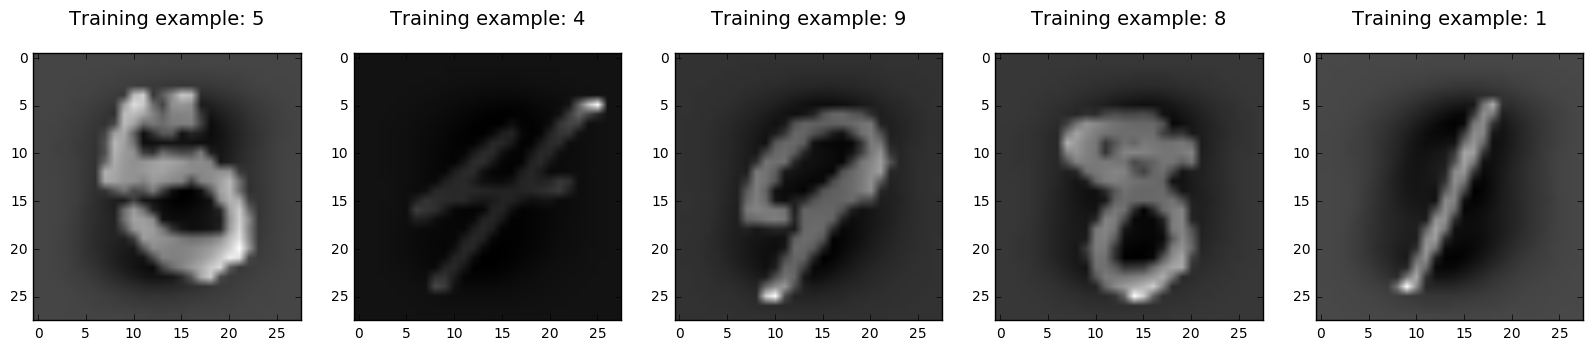

In [24]:
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[5:10], train_label[5:10])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training example: %i\n' % label, fontsize = 14)

### 2.3 Logistic regression is one of the simplest linear classification algorithms. Fit a logistic regression model to the training images. Compute the accuracy of the classifier on the test images, and the time needed to train the model.¶

Hint: Use LogisticRegression from sklearn.linear_model. To increase speed, change the default solver to 'lbfgs'


In [25]:
# Solution
from time import time
from sklearn.linear_model import LogisticRegression

tic = time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_label)
score = logisticRegr.score(test_img, test_label)
toc = time()
print('The total time is %s seconds ' % (toc-tic))
print('The classification accuracy is %s ' % score)

The total time is 42.05135893821716 seconds 
The classification accuracy is 0.9157 


### 2.4 Apply Principle Component Analysis (PCA) to the training signals by keeping only (a) 25%, (b) 75%, and (c) 95% of the energy. For each of the three cases, output the number of the required principle components.Then, plot the Cumulative Explained Variance over PCA. Finally, choose a random image from the dataset, and show its approximation with the PCA components. 

Hint: For computing the Cumulative Explained Variance over PCA use:
```
pca.explained_variance_ratio_.cumsum()

```

In [26]:
# Solution 
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(train_img)
components = pca.transform(train_img)
approximation = pca.inverse_transform(components)
print('PCA used %s components' %pca.n_components_)

PCA used 330 components


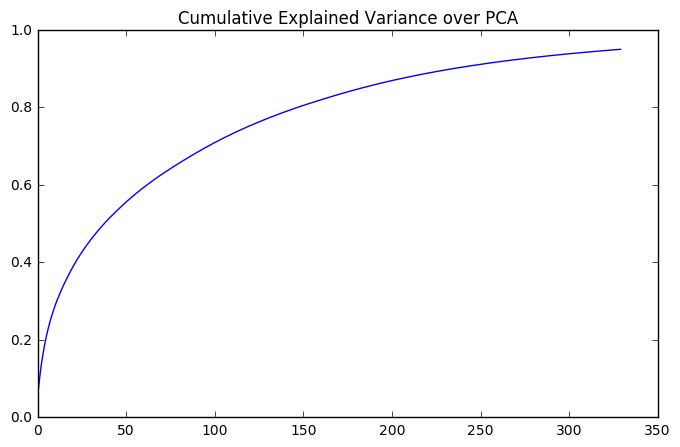

In [29]:
# Plot the Cumulative Explained Variance over PCA

plt.figure(figsize=(8, 5));
plt.title('Cumulative Explained Variance over PCA');
plt.plot(pca.explained_variance_ratio_.cumsum());

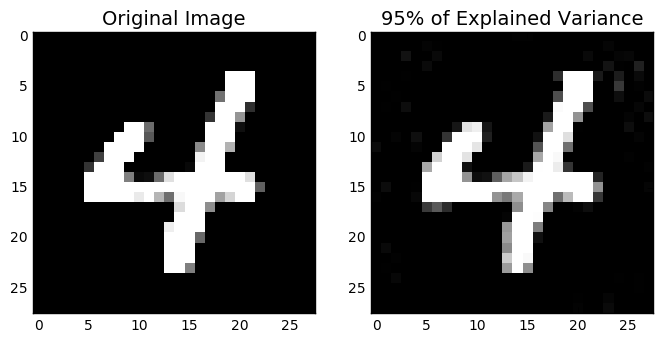

In [31]:
# Choose a random image from the dataset, and show its approximation with the PCA components

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_img[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));

plt.title('Original Image', fontsize = 14);

plt.subplot(1, 2, 2);
plt.imshow(approximation[0].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 1));
plt.title('95% of Explained Variance', fontsize = 14);

### 2.5 Fit a logistic regression model to the approximation of the training images with 95% of explained variance. Compute the accuracy of the classifier and the time needed to train the model. Compare it to the one obtained in 2.3. What do you observe? 


In [32]:
# Solution

tic = time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(components, train_label)
components_test = pca.transform(test_img)
score = logisticRegr.score(components_test, test_label)
toc = time()

print('The total time is %s seconds' % (toc-tic))
print('The classification accuracy is %s ' % score)

The total time is 24.675620079040527 seconds
The classification accuracy is 0.9201 


## Exercise 3: Unsupervised learning with Kmeans

###  3.1: Generate a set of 6 isotropic Gaussian blobs, with 1000 samples each. Each sample should have 60 features. 

Hint: Use the sklearn.datasets.make_blobs to generate the data

In [34]:
# Solution

from sklearn.cluster import KMeans

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=6000, n_features=60, centers=6,
                       random_state=0)




###  3.2: Apply PCA to the generated data. Store the first two principle components and their cluster index to a new dataframe.  Visualize the 6 blobs based only on these two components. 

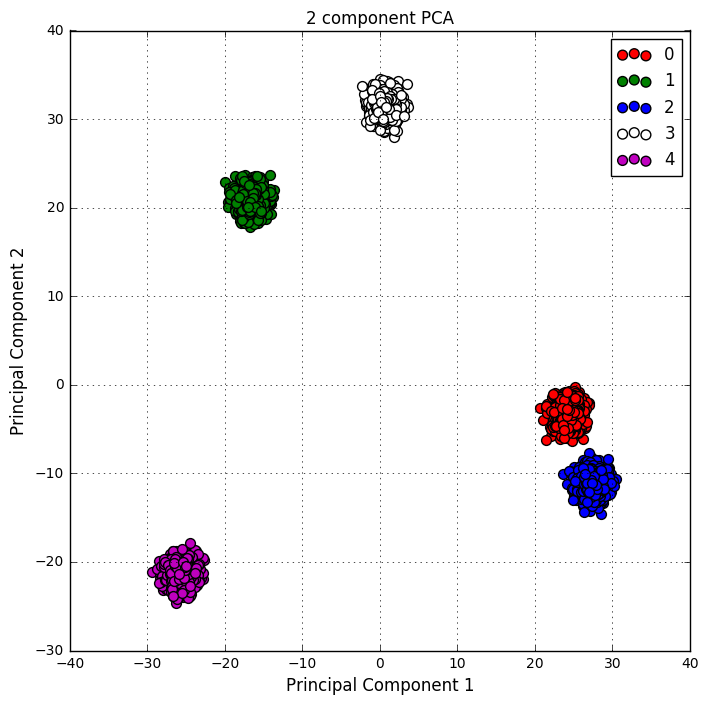

In [42]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df = pd.DataFrame(data = components
             , columns = ['principal component 1', 'principal component 2'])
df['cluster'] = y_true

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 12)
targets = [0, 1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'w', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = df.cluster == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 3.3 Set the number of clusters to 6 and apply Kmeans clustering to the data. Compute the accuracy score between the true labels and the ones estimated by the Kmeans algorithm. 

In [38]:
# Solution

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


from scipy.stats import mode

labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

1.0

### 3.4 Do the same by clustering the data using only the first 2 principle components. What do you observe? 

In [40]:
# Solution
pca = PCA(n_components = 2)
pca.fit(X)
components = pca.transform(X)

kmeans = KMeans(n_clusters=6)
kmeans.fit(components)
y_kmeans = kmeans.predict(components)

labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
accuracy_score(y_true, labels)

1.0